In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1,
               1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 
               0, 5, 10, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

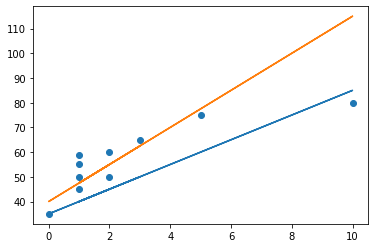

In [4]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)

In [5]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [6]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y

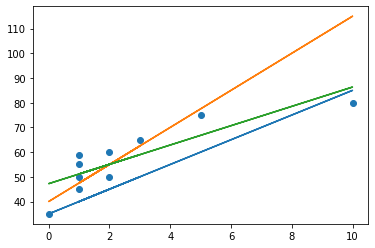

In [7]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [8]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [9]:
calc_mse(y, y_pred1)

143.6

In [10]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [11]:
calc_mae(y, y_pred1)

10.4

In [12]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [13]:
calc_mse(y, y_pred3)

45.93750000000002

In [14]:
calc_mae(y, y_pred3)

6.182142857142859

1. Подберите скорость обучения (alpha) и количество итераций:

<a id="hw"></a>

In [15]:
n = X.shape[1]
alpha = 1e-5
max_iterations = 10**6
W = np.array([1, 0.5])
W, alpha
error_acceptance = 47

Ввел порог приемлемого значения для ошибки **error_acceptance** и максимальное кол-во итераций

Также сделал скорость обучения зависимой от величины ошибки **aplha*error**

In [16]:
for i in range(max_iterations):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    
    if err <= error_acceptance:
        print(i, W, err)
        break
        
    for ii in range(W.shape[0]):
        W[ii] -= alpha * err * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        
    if i == max_iterations-1:
        print(i, W, err)

3917 [45.82665742  4.17024792] 46.99950398131465


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [17]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

0 [45.82666933  4.17025984] 46.99950398131465
100 [45.82783618  4.17142669] 46.99814140431163
200 [45.82895547  4.17254598] 46.996887627492086
300 [45.83002914  4.17361965] 46.99573396328831
400 [45.83105906  4.17464957] 46.99467241782476
500 [45.83204701  4.17563751] 46.99369563552764
600 [45.83299469  4.17658519] 46.992796848157006
700 [45.83390374  4.17749425] 46.99196982790888
800 [45.83477575  4.17836626] 46.991208844262424
900 [45.83561222  4.17920273] 46.99050862427198
